In [2]:
cd

/home/luxx0489


In [1]:
# import packages
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
import pycircstat


from scipy.stats import circmean,circvar,ttest_rel
from mne.preprocessing import ICA
from scipy.io import loadmat, savemat
from mne.viz import plot_evoked_topo, plot_evoked

In [3]:
data_path = './jupyter_projects/StreamingEEG_exp5/'

file_handle = open(data_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)
file_handle.close()

ID_list = np.arange(2,18)
mask = np.ones(len(ID_list),dtype=bool)
mask[3] = False

mask_ch = np.ones(64,dtype=bool)
mask_ch[27] = False

In [5]:
ID_list[mask]

array([ 2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

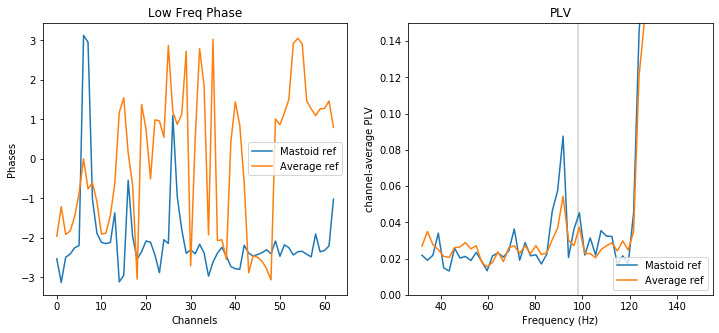

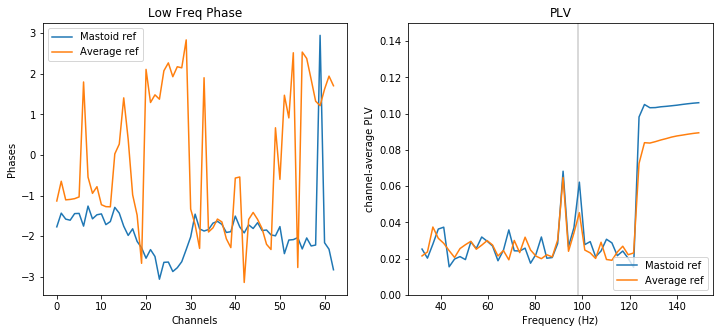

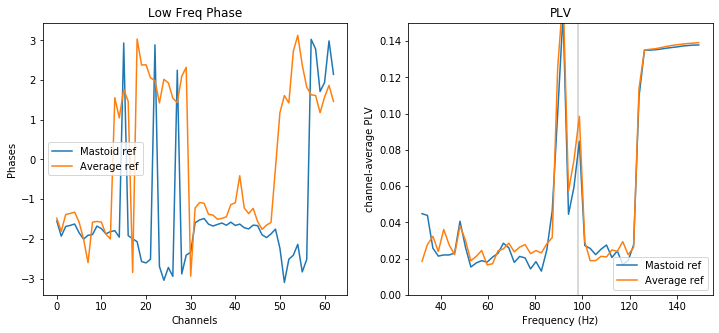

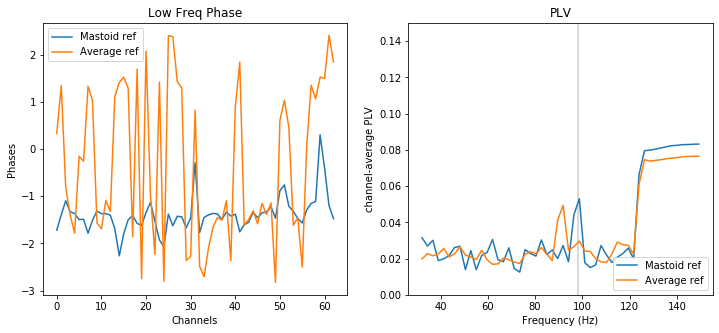

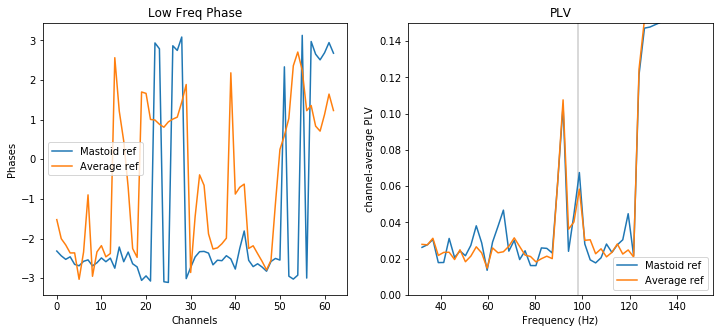

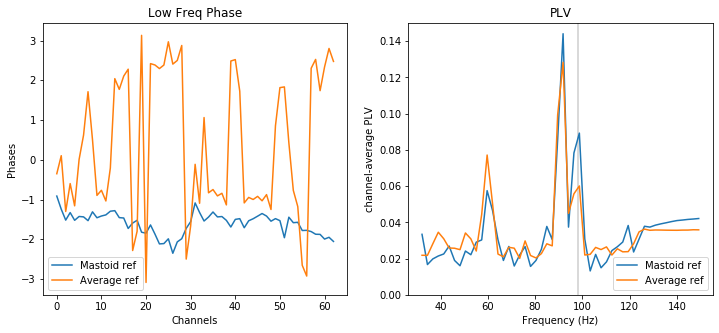

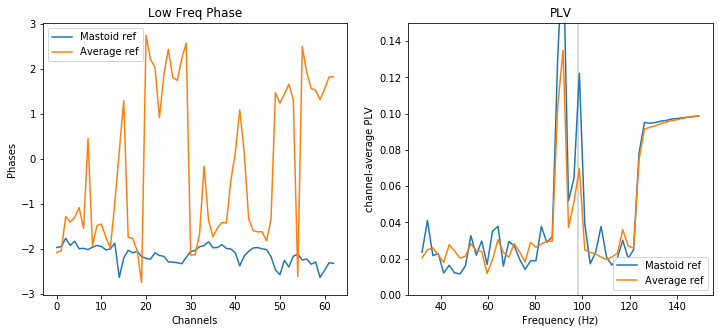

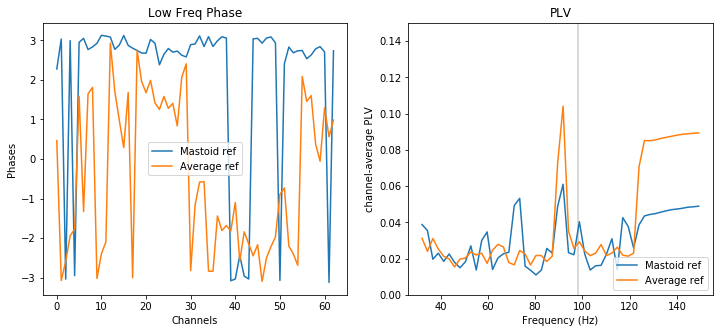

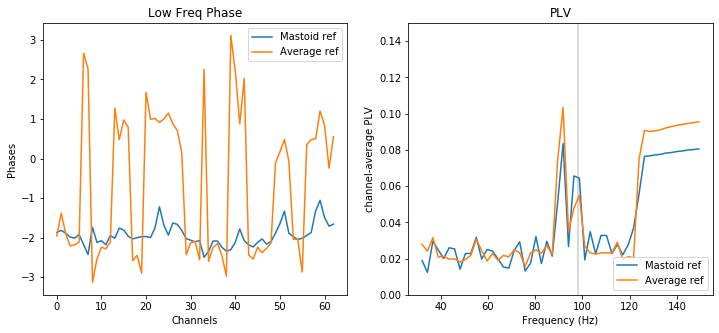

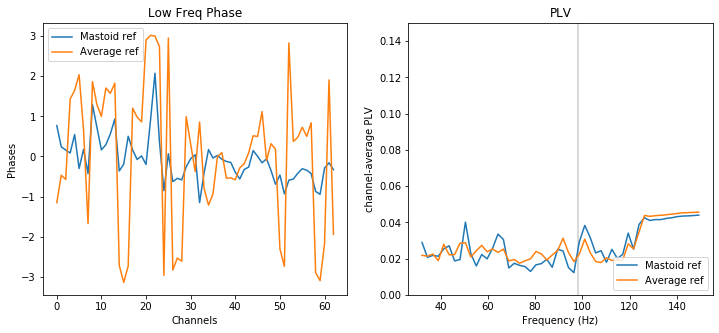

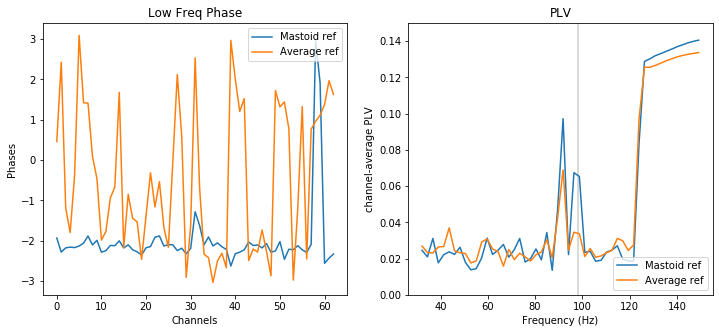

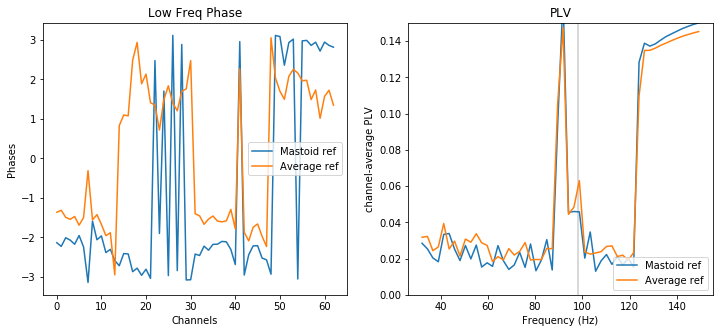

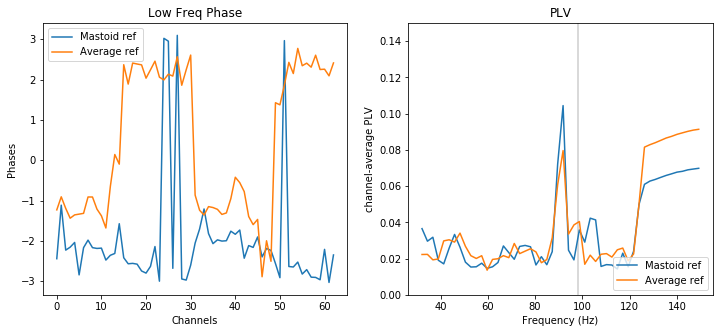

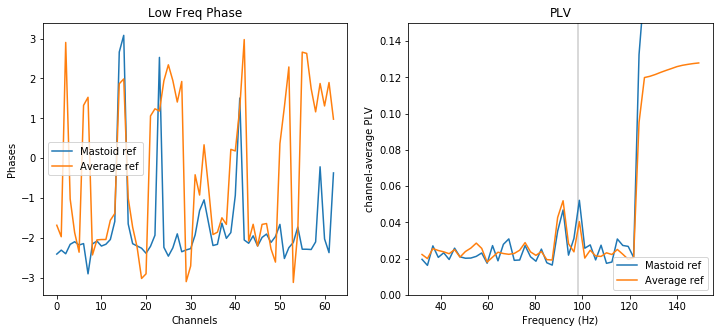

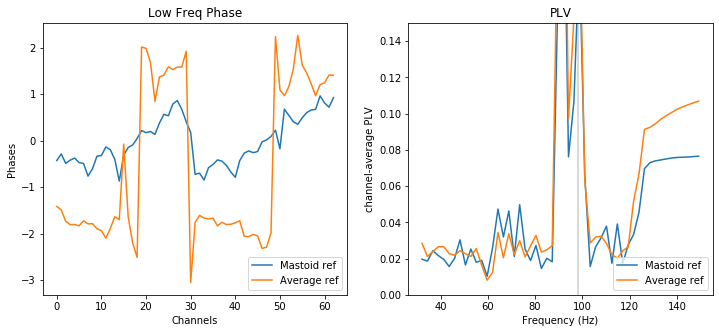

In [5]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat = np.empty((2,len(ID_list[mask]),63))
plv_mat = np.empty((2,len(ID_list[mask]),52))
for iSubject in range(len(ID_list[mask])):
    
    sub_id = 'Sub' + str(ID_list[mask][iSubject])
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_M12_Ref_REcleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT
    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)
    
    sub_id = 'Sub' + str(ID_list[mask][iSubject])
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_AVE_Ref_REcleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT
    x=data.transpose(2,0,1)
    xw_cr = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw_cr = xw_cr/abs(xw_cr)
    
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw.mean(0)[mask_ch,index]),label='Mastoid ref')
    plt.plot(np.angle(xw_cr.mean(0)[:,index]),label='Average ref')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    plv_3 = abs(xw_cr.mean(0))
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>30,freq<150)
    plt.axvline(98.28,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='Mastoid ref')
    plt.plot(freq[passband],plv_3.mean(0)[passband],label='Average ref')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(0,0.15)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-98.28))
    phase_mat[0,iSubject-2,:] = np.angle(xw.mean(0)[mask_ch,index])
    phase_mat[1,iSubject-2,:] = np.angle(xw_cr.mean(0)[:,index])
    
    plv_mat[0,iSubject-2,:] = plv_1.mean(0)[passband]
    plv_mat[1,iSubject-2,:] = plv_3.mean(0)[passband]
    
phase_LF = phase_mat
plv_LF = plv_mat

Text(0.5, 1.0, 'Channel-average PLV at 98 Hz')

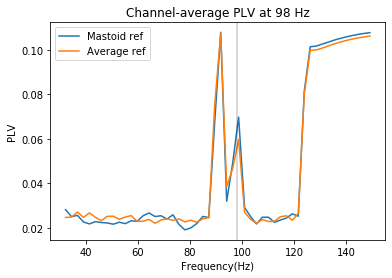

In [6]:
plt.plot(freq[passband],plv_mat[0,:,:].mean(0),label = 'Mastoid ref')
plt.plot(freq[passband],plv_mat[1,:,:].mean(0),label = 'Average ref')
plt.legend()
plt.axvline(98.28,color='k',alpha=0.2)
plt.xlabel('Frequency(Hz)')
plt.ylabel('PLV')
plt.title('Channel-average PLV at 98 Hz')

In [7]:
pos2 = pos[mask_ch,:]

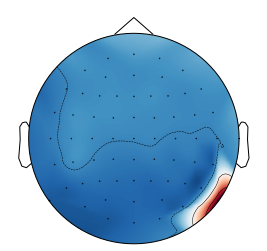

(<matplotlib.image.AxesImage at 0x7fd340fc5c90>,
 <matplotlib.contour.QuadContourSet at 0x7fd340fd13d0>)

In [8]:
phase_m1 = [circmean(phase_mat[0,:,i],high=np.pi,low=-np.pi) for i in range(63)]
mne.viz.plot_topomap(phase_m1,pos2)

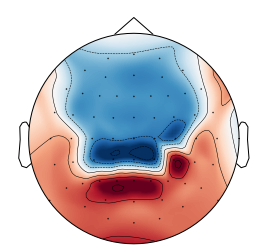

(<matplotlib.image.AxesImage at 0x7fd340f867d0>,
 <matplotlib.contour.QuadContourSet at 0x7fd340f457d0>)

In [9]:
phase_m2 = [circmean(phase_mat[1,:,i],high=np.pi,low=-np.pi) for i in range(63)]
mne.viz.plot_topomap(phase_m2,pos2)

In [10]:
phase_mat_LF = phase_mat

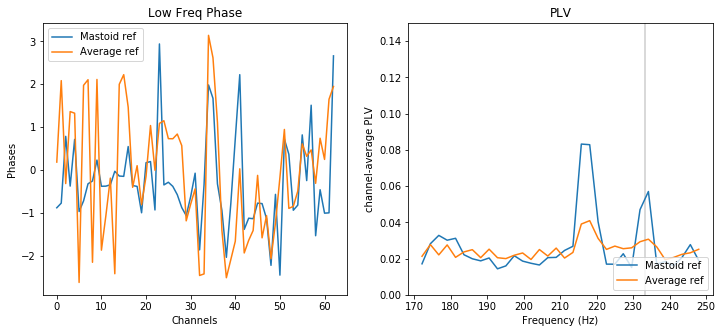

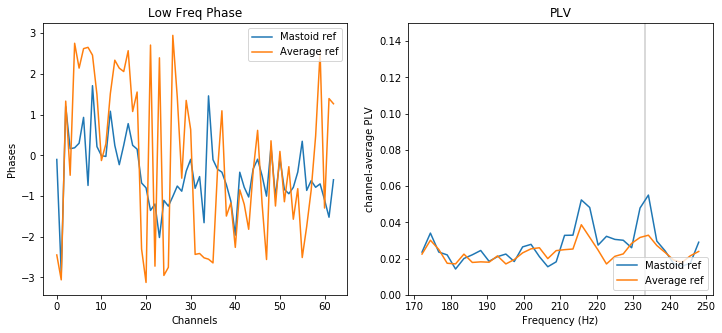

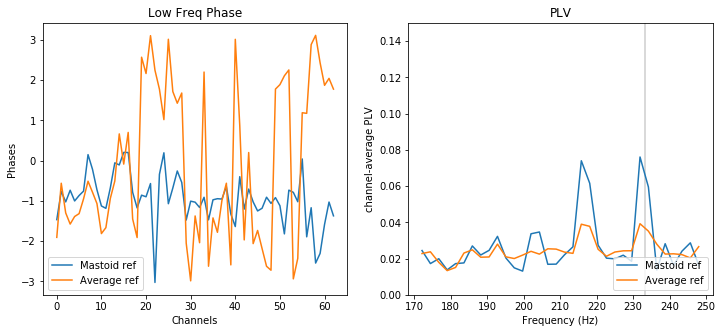

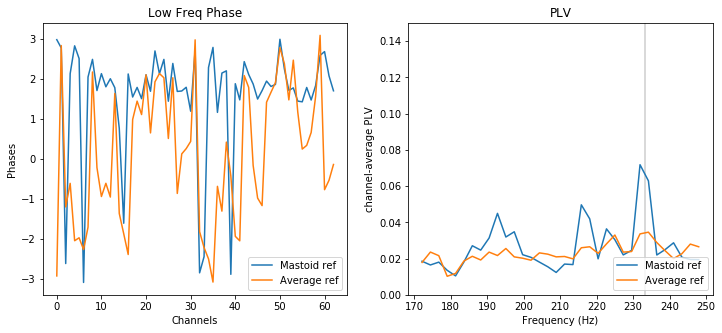

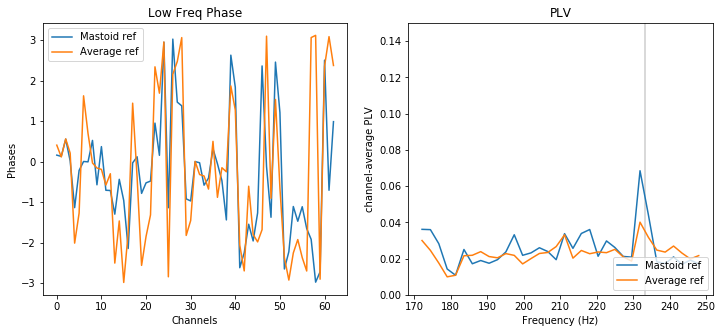

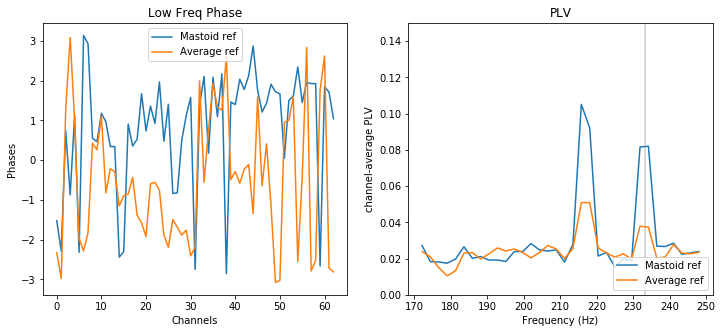

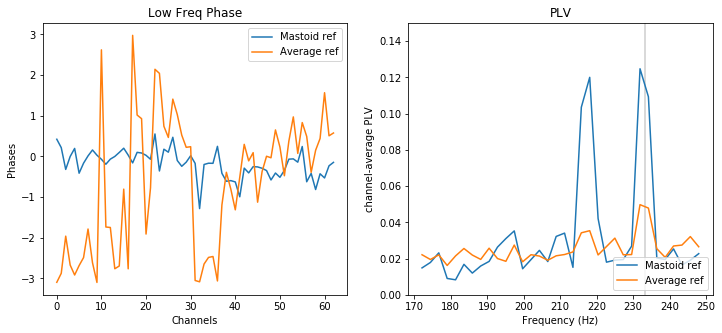

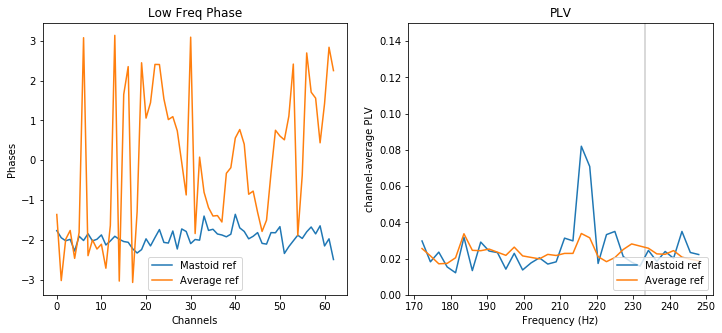

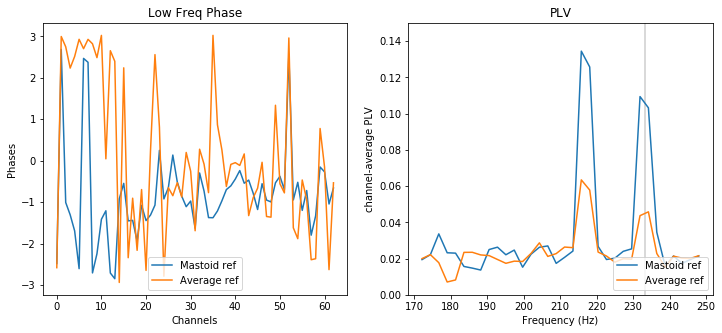

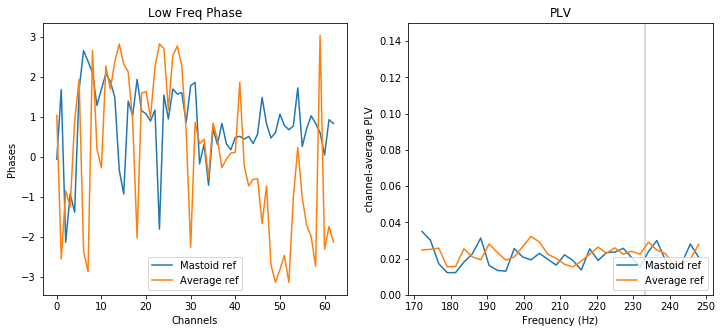

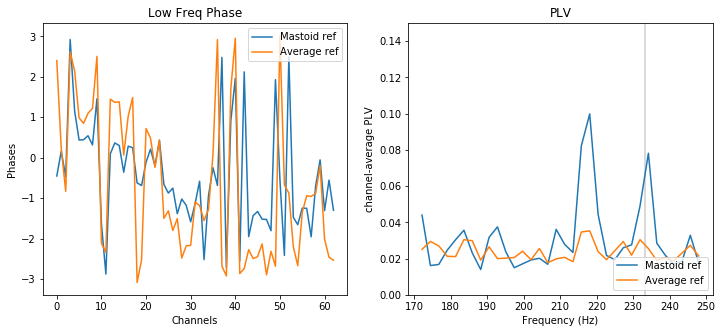

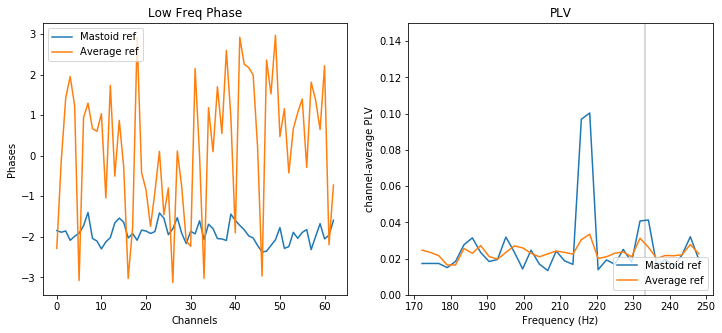

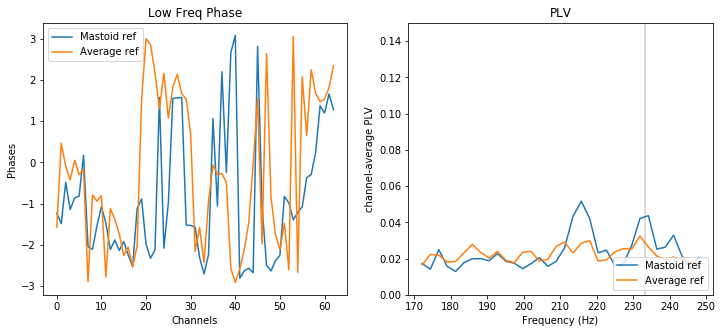

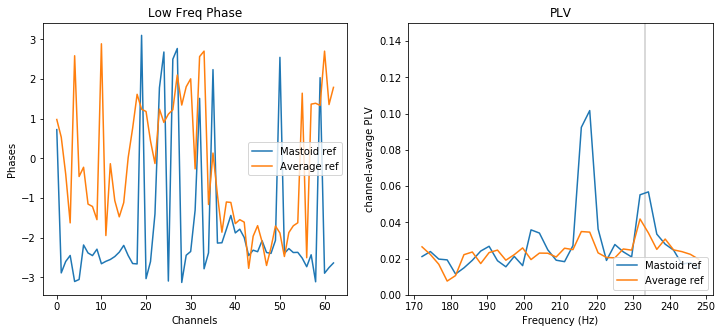

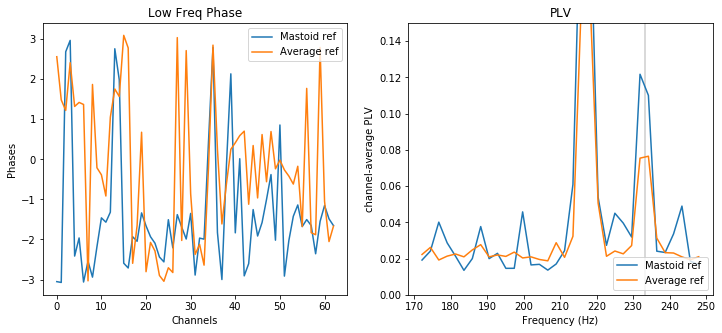

In [11]:
# load data

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

phase_mat = np.empty((2,len(ID_list[mask]),63))
plv_mat = np.empty((2,len(ID_list[mask]),34))
for iSubject in range(len(ID_list[mask])):
    
    sub_id = 'Sub' + str(ID_list[mask][iSubject])
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_HF_M12_Ref_REcleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT
    x=data.transpose(2,0,1)
    xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw = xw/abs(xw)
    freq = np.fft.rfftfreq(x.shape[2],1/1024)
    
    sub_id = 'Sub' + str(ID_list[mask][iSubject])
    mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_HF_AVE_Ref_REcleaned.mat')

    data = mat_contents['Merged_Data'][:,103:103+446,:]

    # FFT
    x=data.transpose(2,0,1)
    xw_cr = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
    xw_cr = xw_cr/abs(xw_cr)
    
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    
    index = np.argmin(abs(freq-98.28))
    plt.plot(np.angle(xw.mean(0)[mask_ch,index]),label='Mastoid ref')
    plt.plot(np.angle(xw_cr.mean(0)[:,index]),label='Average ref')

    plt.xlabel('Channels')
    plt.ylabel('Phases')
    plt.title('Low Freq Phase')
    plt.legend()

    # correct by average phase and ifft

    plv_1 = abs(xw.mean(0))
    plv_3 = abs(xw_cr.mean(0))
    plt.subplot(1,2,2)
    passband = np.logical_and(freq>170,freq<250)
    plt.axvline(233.13,color='k',alpha=0.2)

    plt.plot(freq[passband],plv_1.mean(0)[passband],label='Mastoid ref')
    plt.plot(freq[passband],plv_3.mean(0)[passband],label='Average ref')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('channel-average PLV')
    plt.title('PLV')
    plt.ylim(0,0.15)
    plt.legend(loc='lower right')
    
    index = np.argmin(abs(freq-233.13))
    phase_mat[0,iSubject-2,:] = np.angle(xw.mean(0)[mask_ch,index])
    phase_mat[1,iSubject-2,:] = np.angle(xw_cr.mean(0)[:,index])
    
    plv_mat[0,iSubject-2,:] = plv_1.mean(0)[passband]
    plv_mat[1,iSubject-2,:] = plv_3.mean(0)[passband]
    
phase_HF = phase_mat
plv_HF = plv_mat

Text(0.5, 1.0, 'Channel-average PLV at 233 Hz')

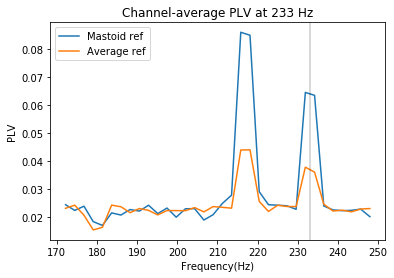

In [12]:
plt.plot(freq[passband],plv_mat[0,:,:].mean(0),label = 'Mastoid ref')
plt.plot(freq[passband],plv_mat[1,:,:].mean(0),label = 'Average ref')
plt.legend()
plt.axvline(233.13,color='k',alpha=0.2)
plt.xlabel('Frequency(Hz)')
plt.ylabel('PLV')
plt.title('Channel-average PLV at 233 Hz')

In [13]:
index = np.argmin(abs(freq[passband]-233.13))
p1 = plv_mat[0,:,index]
p2 = plv_mat[1,:,index]

ttest_rel(p1,p2)

Ttest_relResult(statistic=5.385714363997472, pvalue=9.60540323219763e-05)

In [14]:
phase_mat.shape

(2, 15, 63)

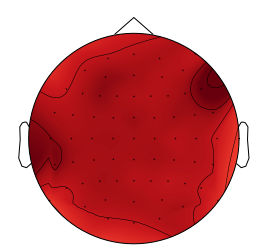

In [15]:
phase_m3 = [circmean(phase_mat[0,:,i],high=np.pi,low=-np.pi) for i in range(63)]
mne.viz.plot_topomap(phase_m3,pos2)
phase_m4 = [circmean(phase_mat[1,:,i],high=np.pi,low=-np.pi) for i in range(63)]

In [16]:
phase_mat_HF = phase_mat

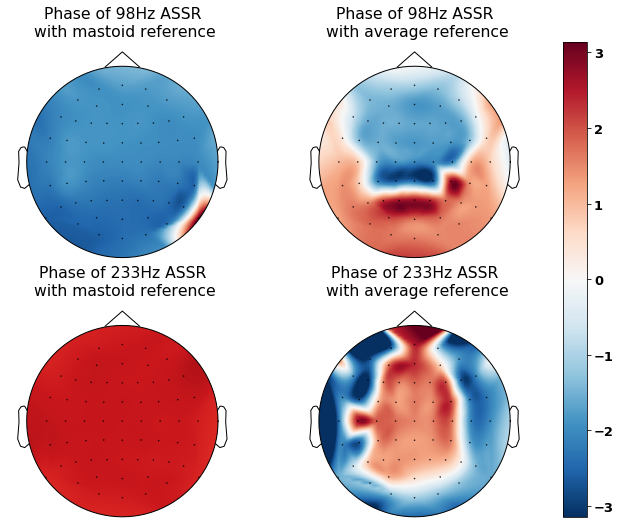

In [17]:
font = {'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(2,2,figsize=(12,8))
im,_ = mne.viz.plot_topomap(phase_m1,pos2,axes=ax[0,0],vmin=-np.pi,vmax=np.pi,show=False,contours=False)
ax[0,0].set(title='Phase of 98Hz ASSR\n with mastoid reference')

im,_ = mne.viz.plot_topomap(phase_m2,pos2,axes=ax[0,1],vmin=-np.pi,vmax=np.pi,show=False,contours=False)
ax[0,1].set(title='Phase of 98Hz ASSR\n with average reference')

im,_ = mne.viz.plot_topomap(phase_m3,pos2,axes=ax[1,0],vmin=-np.pi,vmax=np.pi,show=False,contours=False)
ax[1,0].set(title='Phase of 233Hz ASSR\n with mastoid reference')

im,_ = mne.viz.plot_topomap(phase_m4,pos2,axes=ax[1,1],vmin=-np.pi,vmax=np.pi,show=False,contours=False)
ax[1,1].set(title='Phase of 233Hz ASSR\n with average reference')
fig.colorbar(im,ax=ax)


In [20]:
folder_path + '/phase_dist.obj'

'./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz//phase_dist.obj'

In [21]:

file_handle = open(folder_path + 'phase_dist.obj','wb')
pickle.dump(phase_mat_LF, file_handle)
pickle.dump(phase_mat_HF, file_handle)
file_handle.close()